# Verification of the Inverse Square Law via Linear Regression

## Introduction

This notebook uses linear regression to analyze ionizing radiation data, aiming to verify the inverse square law. By applying `linregress` from `scipy.stats`, we explore the relationship between radiation intensity and distance from the source.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
distances_m = np.array([0.153, 0.135, 0.115, 0.095, 0.075, 0.055, 0.035])
counts_in_60s = np.array([3078, 4211, 4996, 6799, 10218, 15924, 32831])

# Background correction
background_counts = 60  # Total background counts in 60 seconds
background_rate = background_counts / 60

# Correcting counts for background radiation and converting to rates
corrected_count_rates = (counts_in_60s / 60) - background_rate

# Preparing data for linear regression: Inverse square of distance
inverse_square_distance = 1 / distances_m**2


## Linear Regression Analysis

Linear regression quantifies how radiation intensity varies with distance. We fit a linear model to our data, focusing on the slope and intercept to understand this relationship.


In [9]:
# Linear regression on the corrected count rates
result = linregress(inverse_square_distance, corrected_count_rates)

# Displaying linear regression results
print(f"Slope: {result.slope}")
print(f"Intercept: {result.intercept}")
print(f"R-squared: {result.rvalue**2}")


Slope: 0.6312011174870156
Intercept: 39.79197518763144
R-squared: 0.994768304567546


## Visualizing the Fit

Visualization plays a pivotal role in data analysis. By plotting our data points and the linear regression line, we can visually assess the fit. This plot not only serves to confirm the validity of the inverse square law but also helps us identify any outliers or anomalies in the data. A well-fitting line would suggest that the radiation intensity indeed decreases with the square of the distance from the source, in line with our theoretical expectations.


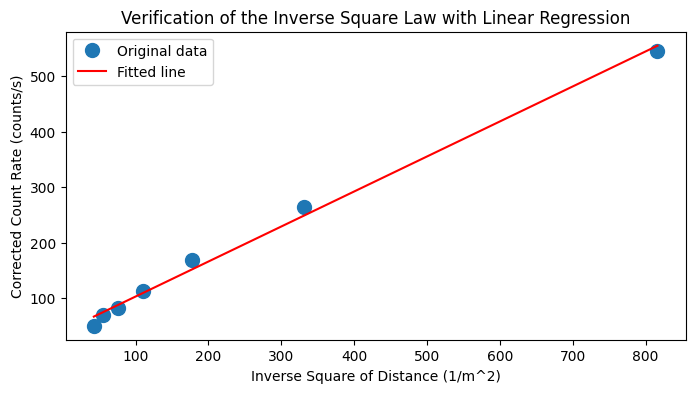

In [10]:
# Plotting the data and the linear fit
plt.figure(figsize=(8, 4))
plt.plot(inverse_square_distance, corrected_count_rates, 'o', label='Original data', markersize=10)
plt.plot(inverse_square_distance, result.intercept + result.slope * inverse_square_distance, 'r', label='Fitted line')
plt.xlabel('Inverse Square of Distance (1/m^2)')
plt.ylabel('Corrected Count Rate (counts/s)')
plt.title('Verification of the Inverse Square Law with Linear Regression')
plt.legend()
plt.show()


## Understanding Linear Regression Under the Hood

Linear regression is built on assumptions that need to be met for the analysis to be reliable. These include the linearity between the dependent and explanatory variables, independence of the errors, homoscedasticity (constant variance of errors), and normal distribution of the errors. By ensuring these conditions are met, we enhance the credibility of our regression model. Let's look into the statistics 'Under the Hood' of our analysis, exploring the significance of the slope, the intercept, and how they relate to our investigation of the inverse square law.


## Additional Statistical Analysis

Beyond the slope and intercept, understanding the variability and reliability of our linear regression model is crucial. We calculate the standard error of the slope and construct confidence intervals to measure the precision of our estimates. These statistical tools give us insight into the uncertainty of our model's parameters, allowing us to gauge the confidence in our findings and their implications for supporting the inverse square law.


In [11]:
from scipy.stats import t

n = len(inverse_square_distance)  # Number of observations
x_mean = np.mean(inverse_square_distance)
sse = np.sum((corrected_count_rates - (result.intercept + result.slope * inverse_square_distance))**2)
se_slope = np.sqrt(sse / (n - 2) / np.sum((inverse_square_distance - x_mean)**2))

# Confidence Interval calculations
alpha = 0.05  # For a 95% confidence interval
df = n - 2  # Degrees of freedom
t_critical = t.ppf(1 - alpha / 2, df)
margin_error_slope = t_critical * se_slope
ci_lower = result.slope - margin_error_slope
ci_upper = result.slope + margin_error_slope

# Displaying SE and CI
print(f"Standard Error of the Slope: {se_slope:.4f}")
print(f"95% Confidence Interval for the Slope: [{ci_lower:.4f}, {ci_upper:.4f}]")


Standard Error of the Slope: 0.0205
95% Confidence Interval for the Slope: [0.5786, 0.6838]


## Conclusion

In concluding our analysis, we reflect on the adherence of our experimental data to the inverse square law, as illuminated by our linear regression model. The R-squared value, a measure of how well the observed outcomes are replicated by the model, serves as a testament to the law's validity within our experiment. The journey through data preparation, regression analysis, and statistical exploration not only confirms a fundamental physical law but also exemplifies the power of statistical methods in uncovering the truths of our universe.
